In [1]:
%matplotlib inline

import numpy as np
import scipy
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pylab
from sklearn.decomposition import PCA
from sklearn.utils import shuffle

plt.style.use('ggplot')

In [2]:
feature_label = np.load('../data/tag_name.npy')
train_X = np.load('../data/train_X.npy')
train_binary_Y = np.load('../data/train_binary_Y.npy')
valid_test_X = np.load('../data/valid_test_X.npy')

In [3]:
print(feature_label)
print("feature_label shape: " + str(feature_label.shape))
print("train_X shape: " + str(train_X.shape))
print("train_binary_Y shape: " + str(train_binary_Y.shape))
print("valid_test_X shape: " + str(valid_test_X.shape))

['faces' 'left_foot' 'visual_digits' 'left_hand' 'calculation' 'language'
 'horizontal_checkerboard' 'human_sound' 'vertical_checkerboard' 'objects'
 'places' 'scramble' 'right_hand' 'right_foot' 'visual_words' 'visual'
 'non_human_sound' 'auditory' 'saccades']
feature_label shape: (19,)
train_X shape: (4602, 26, 31, 23)
train_binary_Y shape: (4602, 19)
valid_test_X shape: (1971, 26, 31, 23)


In [4]:
train_X = train_X.reshape([-1, 26*31*23])
print(train_X.shape)

(4602, 18538)


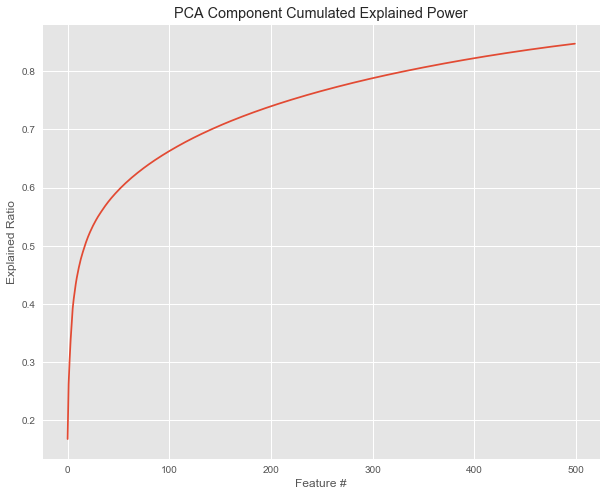

In [11]:
pca = PCA(n_components=500)
pca.fit(train_X)

cumulated_explained_variance_ratio = np.zeros(len(pca.explained_variance_ratio_))
cumulated_explained_variance_ratio[0] = pca.explained_variance_ratio_[0]
for i in range(1, len(pca.explained_variance_ratio_)):
    cumulated_explained_variance_ratio[i]=cumulated_explained_variance_ratio[i-1]+pca.explained_variance_ratio_[i]
plt.figure(figsize=(10,8))
plt.plot(cumulated_explained_variance_ratio)
plt.title('PCA Component Cumulated Explained Power')
plt.xlabel('Feature #')
plt.ylabel('Explained Ratio')
plt.show()